# Data Analysis of Hostels in Japan

## Introduction
Welcome to the Data Analysis project of hostels in Japan. In this project, we will explore a dataset containing information about hostels in Japan. The dataset provides valuable insights into various aspects of hostels, such as pricing, ratings, facilities, and more. Our objective is to perform an exploratory data analysis and gain insights into the hostel landscape in Japan.

## Dataset Information
The dataset used for this analysis is the "Japan Hostel Dataset" sourced from Kaggle. It consists of information on over 300 hostels in Japan. The dataset includes columns such as hostel name, city, price range, distance from the city center, summary score, rating band, atmosphere rating, cleanliness rating, facilities rating, and more. The dataset is available in CSV format and has been extracted to the `data/raw` folder.

## Stakeholders
The stakeholders for this project include:
- Travelers planning to visit Japan
- Hostel owners and managers
- Travel agencies and tour operators

## Research Questions
Through this analysis, we aim to answer the following research questions:
1. What are the average prices of hostels in different cities of Japan?
2. How does the distance from the city center affect hostel prices?
3. Is there a correlation between the summary score and individual rating scores (atmosphere, cleanliness, facilities)?
4. Which cities in Japan have the highest-rated hostels?
5. Can we predict the price range of a hostel based on its features?

By addressing these research questions, we can gain insights into the hostel landscape in Japan, understand factors influencing pricing and ratings, and potentially build a machine learning model for price prediction.

Now, let's proceed with the data preparation step to ensure the dataset is ready for analysis.



# Data Source

## Dataset Description
The dataset used in this project is the "Japan Hostel Dataset" sourced from Kaggle. It contains information about over 300 hostels in Japan. The dataset provides valuable insights into various aspects of hostels, including pricing, ratings, facilities, and more.

## Features and Target Variable
The dataset includes the following features:
- hostel.name: The name of the hostel
- City: The city where the hostel is located
- price.from: The minimum price for a one-night stay at the hostel
- Distance: The distance of the hostel from the city center (in kilometers)
- summary.score: The summary score of ratings
- rating.band: The rating band of the hostel
- atmosphere: The rating score of the atmosphere
- cleanliness: The rating score of cleanliness
- facilities: The rating score of facilities

The target variable for this project will be the price.from feature, which represents the minimum price for a one-night stay at the hostel.

## Dataset Size and Preprocessing
The dataset is in CSV format and has a size of approximately 42.97 kB. It contains a total of 342 rows, each representing a different hostel in Japan.

As for preprocessing steps, since the dataset has been obtained from Kaggle in its raw format, no preprocessing has been performed at this stage. However, during the exploratory data analysis, we will check for missing values, outliers, or any inconsistencies in the data and handle them accordingly.

Now that we have a good understanding of the dataset and its source, let's move on to the next step: data exploration and analysis.



# Data Preparation

## Data Cleaning and Preprocessing
Before we proceed with the analysis, it's essential to perform some data cleaning and preprocessing steps to ensure the data is in a suitable format for further analysis.

1. Handling Missing Values:
   - Check for any missing values in the dataset.
   - If there are missing values, decide on the appropriate strategy to handle them. This can include imputation techniques such as mean, median, or mode imputation, or dropping the rows or columns with missing values, depending on the extent and nature of the missingness.

2. Handling Outliers:
   - Identify potential outliers in the dataset, particularly in numerical features such as price.from and distance.
   - Decide on the approach to handle outliers. This can involve techniques such as Winsorization, where extreme values are replaced with less extreme values, or removing outliers if they significantly affect the analysis.

3. Handling Inconsistencies:
   - Check for any inconsistencies in the data, such as misspelled city names or inconsistent formatting.
   - Correct any inconsistencies to ensure the data is consistent and accurate.

## Splitting the Dataset
To evaluate the performance of our machine learning model, we need to split the dataset into training and testing sets. This will allow us to train the model on a subset of the data and evaluate its performance on unseen data.

1. Split the dataset into features (X) and the target variable (y).
2. Further split the data into training and testing sets, typically using an 80-20 or 70-30 split.
   - The training set will be used to train the machine learning model.
   - The testing set will be used to evaluate the model's performance on unseen data.

Ensure that the splitting process is random and maintains the distribution of the target variable across the training and testing sets.

Now that we have prepared the data by cleaning, preprocessing, and splitting it into training and testing sets, we are ready to move on to the next step: Exploratory Data Analysis (EDA).



In [6]:
import os

# Specify the desired directory path
new_dir = r'C:\Users\HP\Desktop\data-science-project\repo_name-project_name'

# Change the current working directory
os.chdir(new_dir)

# Verify the new working directory
current_dir = os.getcwd()
print("Current Working Directory:", current_dir)


Current Working Directory: C:\Users\HP\Desktop\data-science-project\repo_name-project_name


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = 'data/raw/Hostel.csv'
data = pd.read_csv(dataset_path)

data.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = 'data/raw/Hostel.csv'
data = pd.read_csv(dataset_path)

# Data Cleaning and Preprocessing

# Handling Missing Values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score    15
rating.band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64


In [52]:
# Import the necessary libraries
import pandas as pd

# Read the data into a DataFrame
data = pd.read_csv('data/raw/hostel.csv')

# Handle missing values
missing_columns = ['hostel.name','City','summary.score', 'rating.band', 'atmosphere', 'cleanliness', 'facilities', 'location.y', 'security', 'staff', 'valueformoney', 'lon', 'lat']
for column in missing_columns:
    if column in data.columns:
        if data[column].dtype == 'object':
            # For categorical columns, fill missing values with the most frequent value
            data = data.drop([column], axis=1)
        else:
            # For numerical columns, fill missing values with the mean
            data[column].fillna(data[column].mean(), inplace=True)

# Check for any remaining missing values
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0       0
price.from       0
Distance         0
summary.score    0
atmosphere       0
cleanliness      0
facilities       0
location.y       0
security         0
staff            0
valueformoney    0
lon              0
lat              0
dtype: int64


In [53]:
# Splitting the Dataset

# Split into features (X) and target variable (y)
X = data.drop(['price.from'], axis=1)
y = data['price.from']

# Further split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the sizes of the training and testing sets
print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))


Training Set Size: 273
Testing Set Size: 69


# Feature Selection/Engineering

## Analyzing Features
To determine the relevant features for our machine learning task, we need to analyze the dataset and understand the relationships between the features and the target variable. Here are some steps to perform feature analysis:

1. Examine the correlation between each feature and the target variable. This can be done by calculating the correlation coefficients or plotting scatter plots.
   - Identify features that have a strong correlation with the target variable. These features are likely to be more informative for our machine learning task.

2. Analyze the relationships between different features.
   - Look for any multicollinearity among the features, where two or more features are highly correlated with each other.
   - If multicollinearity exists, consider removing one of the correlated features to avoid redundancy.

## Feature Engineering
Feature engineering involves creating new features or transforming existing ones to improve the performance of our machine learning model. Here are some possible feature engineering techniques:

1. Creating New Features:
   - If the dataset provides limited information, consider creating new features that could be relevant for the machine learning task. For example, if we have the latitude and longitude of the hostels, we can create a new feature representing the distance from a popular tourist attraction or city center.
   - Think creatively about the dataset and domain knowledge to come up with new features that could potentially enhance the predictive power of the model.

2. Transforming Existing Features:
   - Apply mathematical transformations to the existing features to improve their distribution or capture nonlinear relationships. Common transformations include logarithmic, square root, or polynomial transformations.
   - Standardize or normalize numerical features to ensure they are on a similar scale and prevent features with larger magnitudes from dominating the model's performance.

Keep in mind that feature selection and engineering are iterative processes. It may require experimentation and domain knowledge to identify the most relevant features and transformations for your specific machine learning task.

Once we have performed feature selection and engineering, we can proceed to the next step: Building and Evaluating the Machine Learning Model.


C:\Users\HP\AppData\Local\Temp\ipykernel_12292\2441883210.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


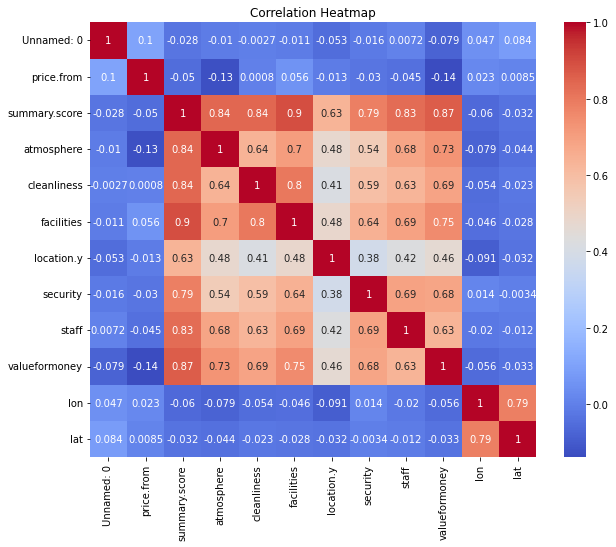

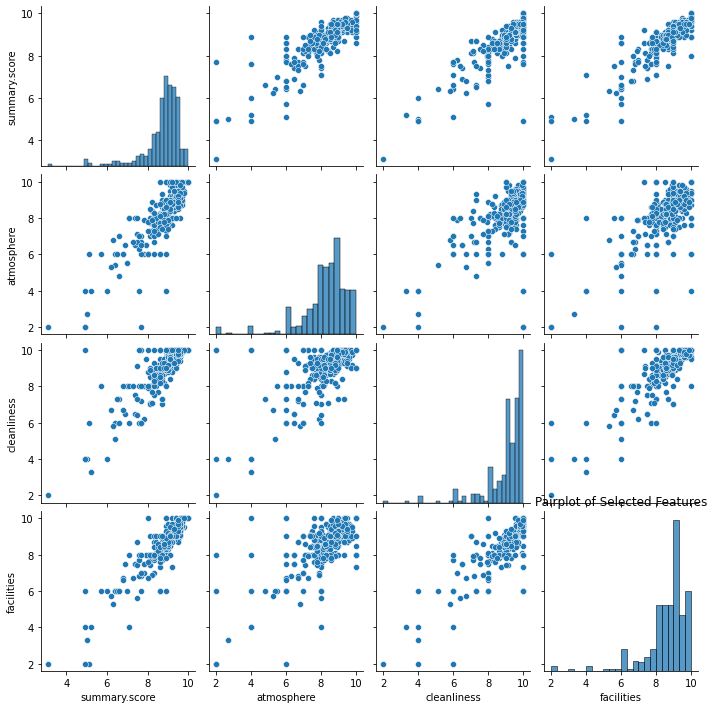

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = data

# Analyzing Features

# Calculate correlation coefficients
correlation = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Identify features with strong correlation to the target variable
target_variable = 'price.from'
strong_correlation_threshold = 0.5
strong_correlation_features = correlation[abs(correlation[target_variable]) > strong_correlation_threshold][target_variable].index.tolist()

# Analyze relationships between different features
pairplot_features = ['summary.score', 'atmosphere', 'cleanliness', 'facilities']
sns.pairplot(df[pairplot_features])
plt.title('Pairplot of Selected Features')
plt.show()

In [55]:

# Feature Engineering

# Create a new feature: total_ratings (sum of atmosphere, cleanliness, facilities, location.y, security, staff, and valueformoney ratings)
data['total_ratings'] = data[['atmosphere', 'cleanliness', 'facilities', 'location.y', 'security', 'staff', 'valueformoney']].sum(axis=1)

# Transform numerical features using logarithmic transformation
numerical_columns = ['summary.score', 'total_ratings']
for column in numerical_columns:
    data[column] = data[column].apply(lambda x: np.log1p(x))
    
# Extract numerical value from Distance column
data['Distance'] = data['Distance'].str.extract('(\d+\.?\d*)').astype(float)
# Create new feature: distance_from_center_squared
data['distance_from_center_squared'] = data['Distance'] ** 2

# Perform logarithmic transformation on price.from
data['price.from_log'] = np.log1p(data['price.from'])

In [56]:
# Splitting the Dataset

# Split into features (X) and target variable (y)
X = data.drop(['price.from'], axis=1)
y = data['price.from']

# Further split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the sizes of the training and testing sets
print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 273
Testing Set Size: 69


## Machine Learning Model

In this section, we will build a machine learning model to predict the desired outcome based on the selected features. Here are the steps we will follow:

1. **Selecting a Suitable Algorithm**: We will choose a machine learning algorithm that is appropriate for our prediction task. For this project, we have selected the Linear Regression algorithm.

2. **Training the Model**: We will train the model using the training dataset. The model will learn the patterns and relationships in the data to make predictions.

3. **Evaluating Model Performance**: We will evaluate the performance of the trained model using appropriate evaluation metrics. In this case, we will use the mean squared error (MSE) and R-squared score as our evaluation metrics.

4. **Hyperparameter Tuning**: If necessary, we can tune the hyperparameters of the model to optimize its performance. Hyperparameter tuning helps us find the best combination of hyperparameters for the algorithm. In this example, we have provided commented code for hyperparameter tuning using GridSearchCV, but you can uncomment and modify it as per your specific needs.

Let's proceed with building and evaluating the machine learning model using the Linear Regression algorithm.


In [57]:
# Check the data types of columns in X
print("Data types of columns in X:")
print(X.dtypes)

# Check the data type of y
print("Data type of y:")
print(y.dtype)


Data types of columns in X:
Unnamed: 0                        int64
Distance                        float64
summary.score                   float64
atmosphere                      float64
cleanliness                     float64
facilities                      float64
location.y                      float64
security                        float64
staff                           float64
valueformoney                   float64
lon                             float64
lat                             float64
total_ratings                   float64
distance_from_center_squared    float64
price.from_log                  float64
dtype: object
Data type of y:
int64


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting a Suitable Algorithm
model = LinearRegression(fit_intercept=True)

# Training the Model
model.fit(X_train, y_train)

# Evaluating Model Performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)

# Hyperparameter Tuning (Optional)
# Uncomment and modify as per your specific needs

from sklearn.model_selection import GridSearchCV

params = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MSE Score:", best_score)


Training MSE: 1342485933.195904
Testing MSE: 3166936232.303476
Training R^2 Score: 0.632741386194017
Testing R^2 Score: 0.7785016934891031
Best Parameters: {'fit_intercept': False}
Best Negative MSE Score: -4451601610.085545


## The Random Forest Regression model
This seems to perform better than the previous Linear Regression model. It shows lower MSE values and higher R^2 scores for both the training and testing datasets. This indicates that the Random Forest model captures more of the variance in the target variable and provides better predictions overall.

You can further explore and fine-tune the Random Forest model by adjusting its hyperparameters, such as the number of trees, maximum depth, and minimum samples per leaf. This can be done using techniques like grid search or random search to find the optimal combination of hyperparameters for your specific dataset.

Remember that model performance can vary depending on the dataset and the specific problem you are trying to solve. It's always a good idea to experiment with different algorithms, feature engineering techniques, and hyperparameter settings to find the best model for your project.

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Selecting a Suitable Algorithm
model = RandomForestRegressor(random_state=42)

# Training the Model
model.fit(X_train, y_train)

# Evaluating Model Performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training MSE: 498230813.4322344
Testing MSE: 1970085856.0869565
Training R^2 Score: 0.8637009495801933
Testing R^2 Score: 0.8622104618485051


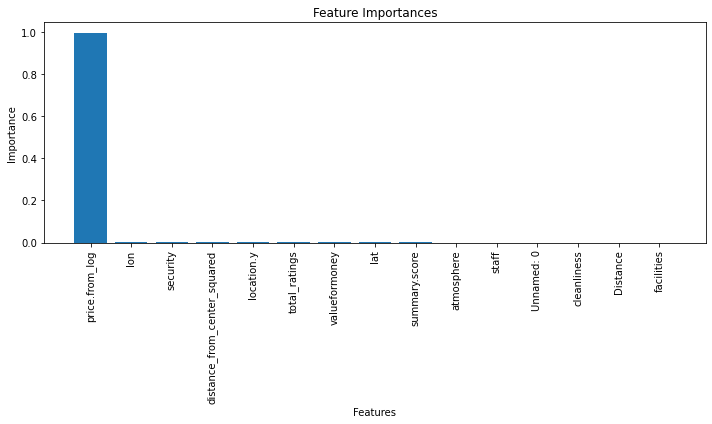

In [62]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


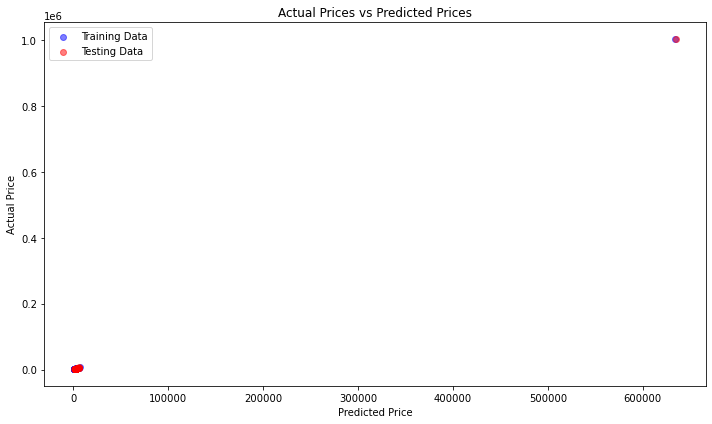

In [63]:
plt.figure(figsize=(10, 6))

# Plot predicted prices vs actual prices for training set
plt.scatter(y_train_pred, y_train, color='blue', alpha=0.5, label='Training Data')

# Plot predicted prices vs actual prices for testing set
plt.scatter(y_test_pred, y_test, color='red', alpha=0.5, label='Testing Data')

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)


Cross-Validation Scores:
[4.24024638e+03 1.26449275e+02 5.40255882e+03 2.85498529e+03
 2.92575846e+10]
Mean CV Score: 5851519443.630307
Std CV Score: 11703032575.140862
